# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: GroveStreet

YOUR-ID: 2021701023

YOUR-NAME: Kanishk Jain

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import open3d as o3d

np.set_printoptions(suppress=True)

# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [2]:
def compute_gaussian(x, k):
    a, m, s = k
    return a * np.exp(-np.square(x - m) / (2 * s ** 2))


def compute_non_linear(x, k):
    p1, p2, p3, p4 = k
    y = p1 * np.exp(-x / p2) + p3 * np.sin(x / p4)
    return y

In [29]:
class Optimizer:
    def __init__(
        self,
        func_name,
        x_obs,
        y_obs,
        coeff,
        lr=1e-2,
        max_iter=200,
        tol=1e-15,
        lambda_=0.8,
    ):

        self.func_name = func_name
        self.func = eval(func_name)
        self.x_obs = x_obs
        self.y_obs = y_obs

        self.init_guess = coeff
        self.coeff = coeff
        self.num_params = len(coeff)

        self.lr = lr
        self.max_iter = max_iter
        self.tol = tol

        self.lambda_ = lambda_

        self.h = 1e-5

        self.loss = []

        self.method = "Gradient Descent"

    def get_residual(self, coeff):
        y_pred = self.func(self.x_obs, coeff)
        return y_pred - self.y_obs

    def get_jacobian(self):
        r = self.get_residual(self.coeff)

        jacobian = []
        for i, param in enumerate(self.coeff):
            coeff = self.coeff.copy()
            coeff[i] += self.h
            r_h = self.get_residual(coeff)
            partial_derv = (r_h - r) / self.h
            jacobian.append(partial_derv)
        jacobian = np.array(jacobian)

        return jacobian

    def gradient_descent(self):
        self.method = "Gradiant Descent"
        for _ in range(self.max_iter):
            J_r = self.get_jacobian()
            r = self.get_residual(self.coeff)
            J_F = J_r @ r

            delta = -self.lr * J_F
            self.coeff = self.coeff + delta

            loss = np.linalg.norm(r)
            self.loss.append(loss)

            if loss < self.tol:
                return self.coeff
        return self.coeff

    def gauss_newton(self):
        self.method = "Gauss Newton"
        for _ in range(self.max_iter):
            J_r = self.get_jacobian()
            r = self.get_residual(self.coeff)
            J_F = np.linalg.pinv(J_r @ J_r.T) @ J_r @ r

            delta = -self.lr * J_F
            self.coeff = self.coeff + delta

            loss = np.linalg.norm(r)
            self.loss.append(loss)

            if loss < self.tol:
                return self.coeff
        return self.coeff

    def levenberg_marquardt(self):
        self.method = "Levenberg Marquardt"
        for _ in range(self.max_iter):
            J_r = self.get_jacobian()
            r = self.get_residual(self.coeff)

            J_F = (
                np.linalg.pinv(J_r @ J_r.T + self.lambda_ * np.eye(self.num_params))
                @ J_r
                @ r
            )

            delta = -self.lr * J_F
            self.coeff = self.coeff + delta

            loss = np.linalg.norm(r)
            self.loss.append(loss)

            if loss < self.tol:
                return self.coeff
        return self.coeff

    def plot_graphs(self):
        y_pred = self.func(self.x_obs, self.coeff)

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

        x_range = list(range(len(self.loss)))
        ax[0].plot(x_range, self.loss)
        ax[0].set_title(f"Loss vs Num Iterations {self.method}")

        ax[1].plot(self.x_obs, self.y_obs, label="GT")
        ax[1].plot(self.x_obs, y_pred, "co")
        ax[1].plot(self.x_obs, y_pred, label="Pred")
        ax[1].legend()
        ax[1].set_title(f"Predicted vs GT {self.method}")

        main_title = (
            f"InitGuess: {self.init_guess}, LR: {self.lr}, MaxIter: {self.max_iter}"
        )
        if self.method == "Levenberg Marquardt":
            main_title += f", Lambda: {self.lambda_}"
        plt.suptitle(main_title)
        plt.show()

    def compare_runs(
        self,
        opt_method,
        lr=[1e-2, 1e-5],
        max_iter=[200, 1000],
        lambda_=[0.3, 0.6, 0.9],
        num_guess=4,
    ):
        assert opt_method in ["gradient_descent", "gauss_newton", "levenberg_marquardt"]
        
        init_guesses = np.random.randint(8, 20, (num_guess, self.num_params))
        for init_guess in init_guesses:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
            ax[1].plot(self.x_obs, self.y_obs, label="GT")
            for lr_ in lr:
                self.lr = lr_
                for m_iter in max_iter:
                    self.max_iter = m_iter

                    self.init_guess = init_guess
                    self.coeff = init_guess

                    self.loss = []
                    eval("self." + opt_method)()

                    y_pred = self.func(self.x_obs, self.coeff)

                    x_range = list(range(len(self.loss)))
                    ax[0].plot(x_range, self.loss, '--', label=f"lr_{lr_:.4f}_itrs_{m_iter:4d}")
                    ax[0].legend()
                    ax[0].set_title(f"Loss vs Num Iterations {self.method}")

                    ax[1].plot(self.x_obs, y_pred, '--', label=f"lr_{lr_:.4f}_itrs_{m_iter:4d}")
                    ax[1].legend()
                    ax[1].set_title(f"Predicted vs GT {self.method}")

                    main_title = f"InitGuess: {self.init_guess}, Method: {self.method}"
                    plt.suptitle(main_title)
            plt.show()

In [30]:
a_gt = 10
m_gt = 0
s_gt = 20
k_gt = np.array([a_gt, m_gt, s_gt])

x_obs = np.linspace(-25, 25, num=50)
y_obs = compute_gaussian(x_obs, k_gt)

Final Gradient Descent parameters: [ 9.78969007  0.22122006 21.25474311]


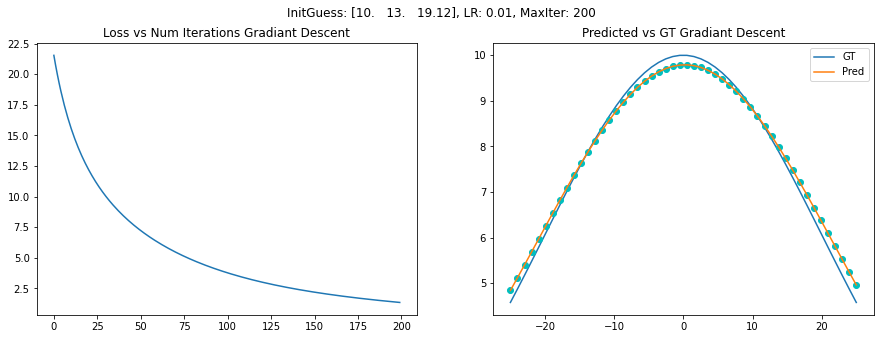

In [31]:
init_coeff = np.array([10.0, 13.0, 19.12])

optimizer = Optimizer("compute_gaussian", x_obs, y_obs, init_coeff, max_iter=200)

## Gradeint Descent
coeff = optimizer.gradient_descent()
print(f"Final Gradient Descent parameters: {coeff}")

optimizer.plot_graphs()

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.



In [32]:
p1, p2, p3, p4 = 2, 8, 4, 8
k_gt = np.array([p1, p2, p3, p4])

x_obs = np.linspace(-20, 30, num=50)
y_obs = compute_non_linear(x_obs, k_gt)

Final Gradient Descent parameters: [ 2.9852857  10.02695762  4.10191033  7.63864975]


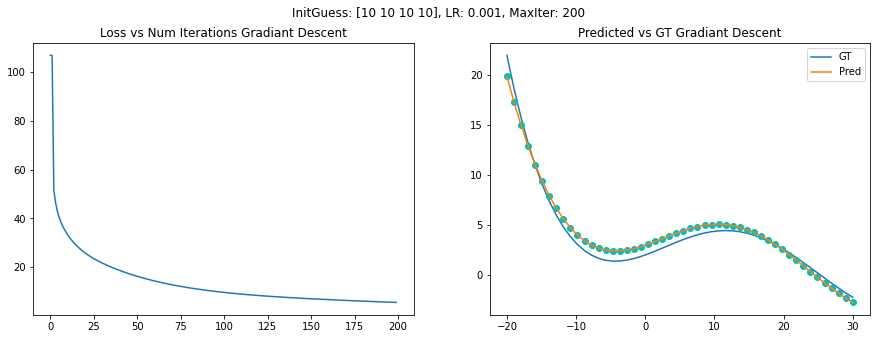

In [33]:
init_coeff = np.array([10, 10, 10, 10])

optimizer = Optimizer(
    "compute_non_linear", x_obs, y_obs, init_coeff, lr=1e-3, max_iter=200
)

## Gradeint Descent
coeff = optimizer.gradient_descent()
print(f"Final Gradient Descent parameters: {coeff}")

optimizer.plot_graphs()

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

### Gauss Newton Method

In [40]:
a_gt = 10
m_gt = 0
s_gt = 20
k_gt = np.array([a_gt, m_gt, s_gt])

x_obs = np.linspace(-25, 25, num=50)
y_obs = compute_gaussian(x_obs, k_gt)

Final Gauss Newton parameters: [ 9.75338885  1.63645821 20.39310623]


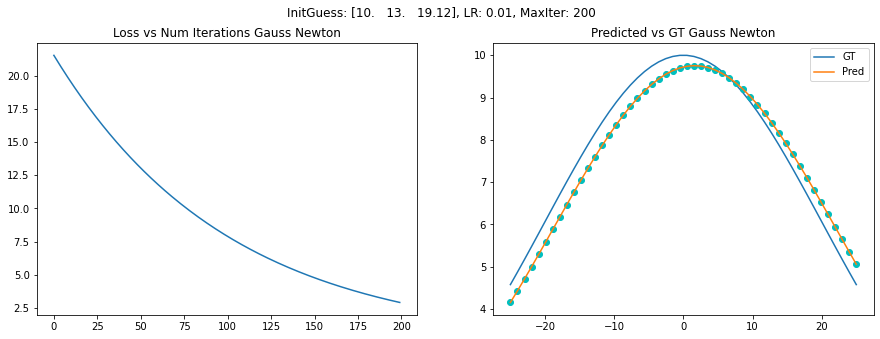

In [41]:
init_coeff = np.array([10.0, 13.0, 19.12])

optimizer = Optimizer("compute_gaussian", x_obs, y_obs, init_coeff, max_iter=200)

## Gauss Newton
coeff = optimizer.gauss_newton()
print(f"Final Gauss Newton parameters: {coeff}")

optimizer.plot_graphs()

### Levenberg Marquardt Method

Final Levenberg Marquardt parameters: [ 9.5576307   3.08198477 21.59965105]


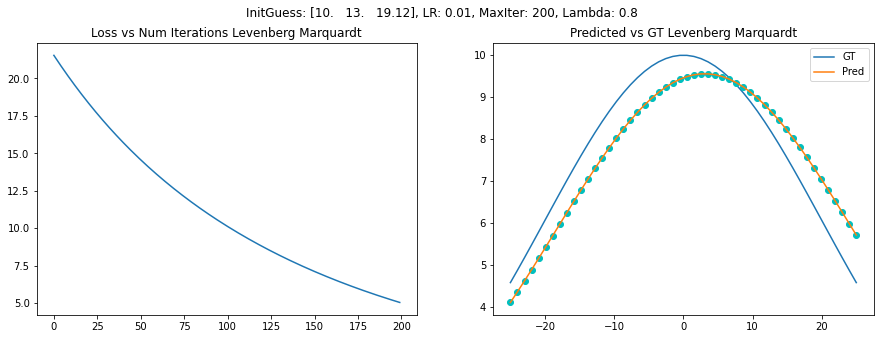

In [42]:
init_coeff = np.array([10.0, 13.0, 19.12])

optimizer = Optimizer(
    "compute_gaussian", x_obs, y_obs, init_coeff, max_iter=200, lambda_=0.8
)

## Levenberg Marquardt
coeff = optimizer.levenberg_marquardt()
print(f"Final Levenberg Marquardt parameters: {coeff}")

optimizer.plot_graphs()

### Choice of initial estimate and learning rate on convergence

Choice of initial estimate decides the local minima that the optimizer will converge to. For example if the initial estimate is near a non-optimal local minima, then the optimization algorithms will converge to and get stuck in this non-optimal minima. Choice of learning rate decides the rate of convergence to minima. Small learning rate can result in very slow convergence and high learning rate can cause the minima to be overshot and result in oscillation around the minima. Runs with different initial guess and learning rate for each optimization method are provided below:-

### Optimization methods with different initial guess and  learning rates

#### Gradient Descent Runs

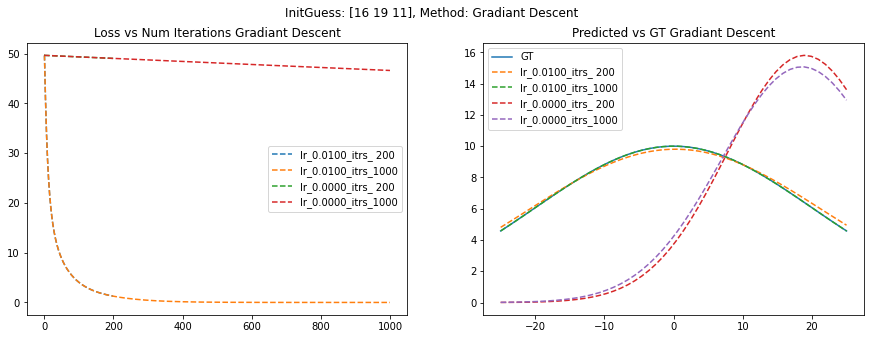

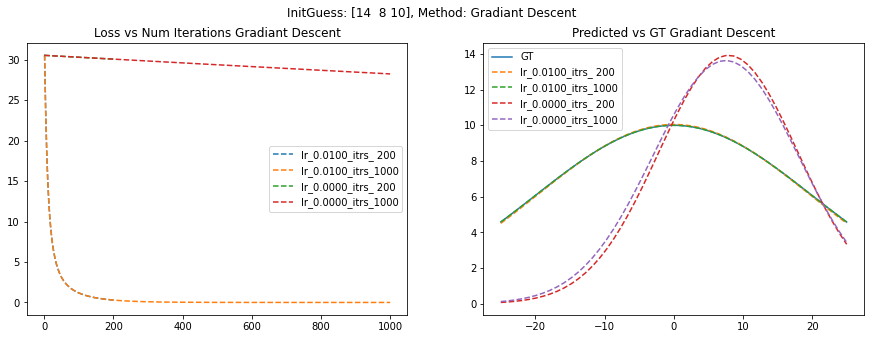

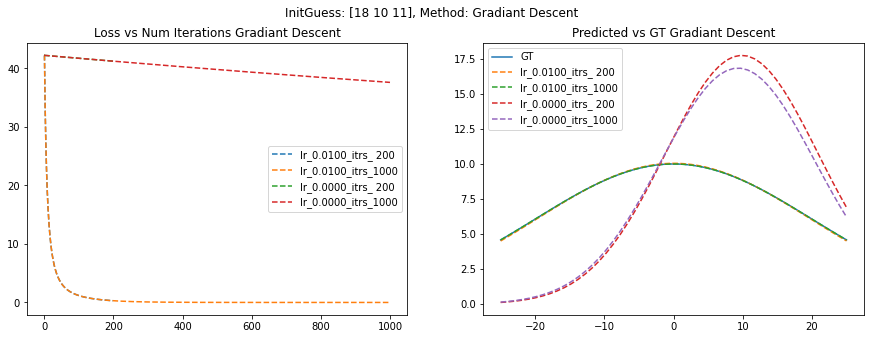

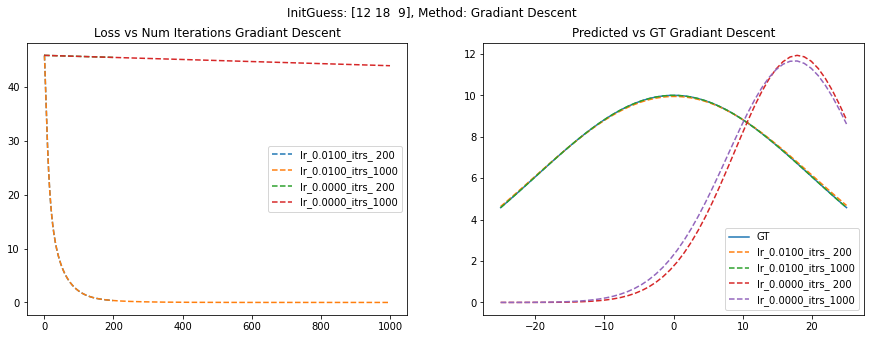

In [43]:
optimizer.compare_runs(opt_method='gradient_descent')

#### Gauss Newton Runs

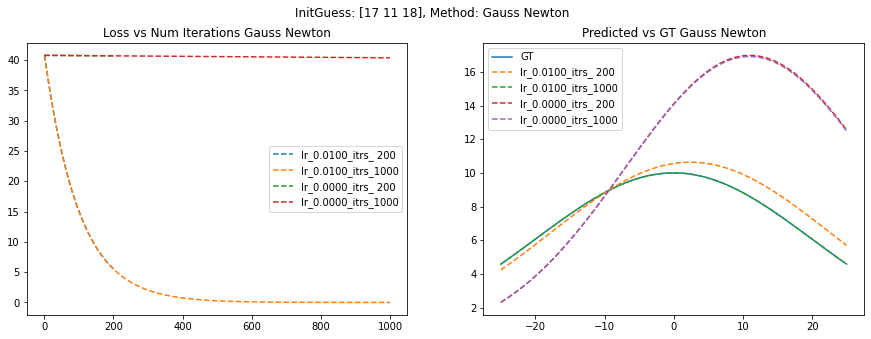

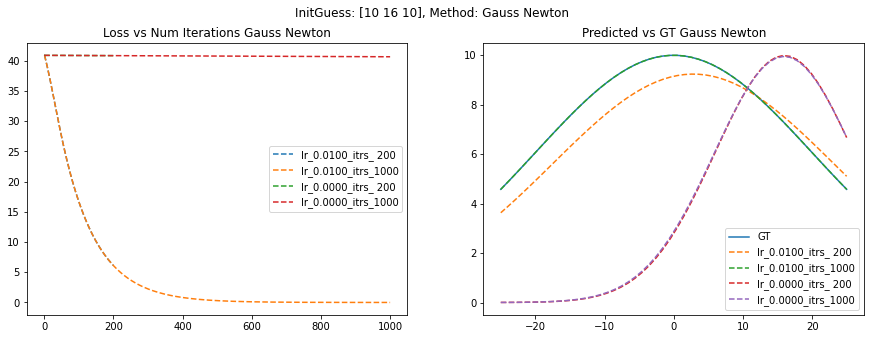

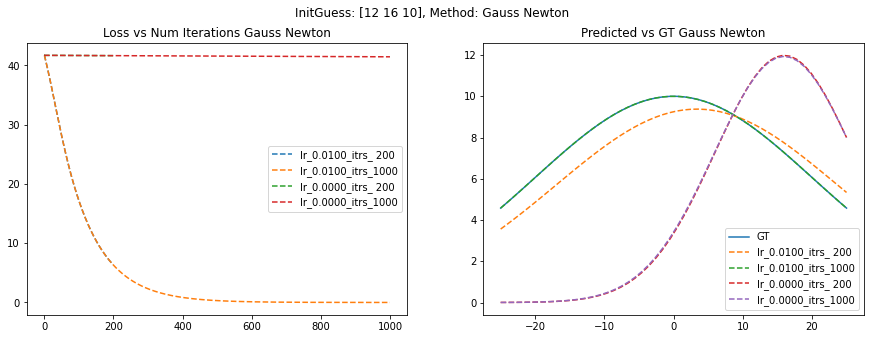

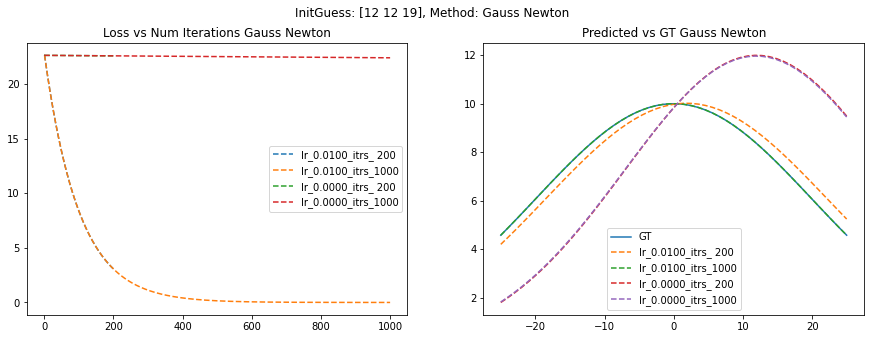

In [38]:
optimizer.compare_runs(opt_method='gauss_newton')

#### Levenberg Marquardt Runs

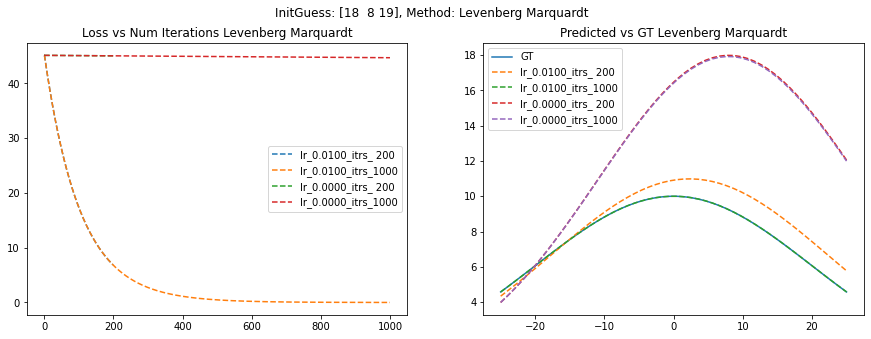

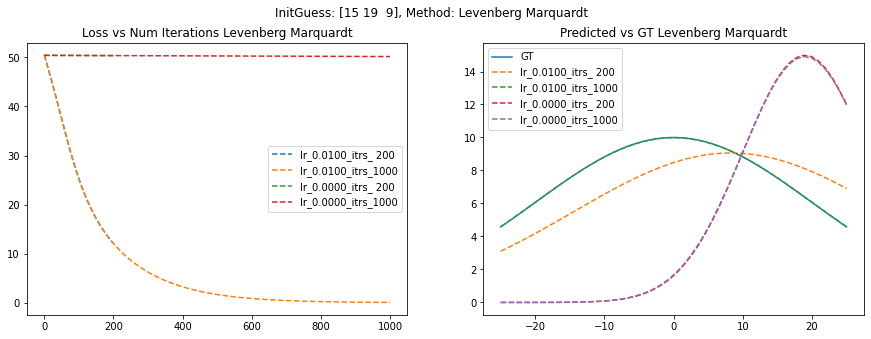

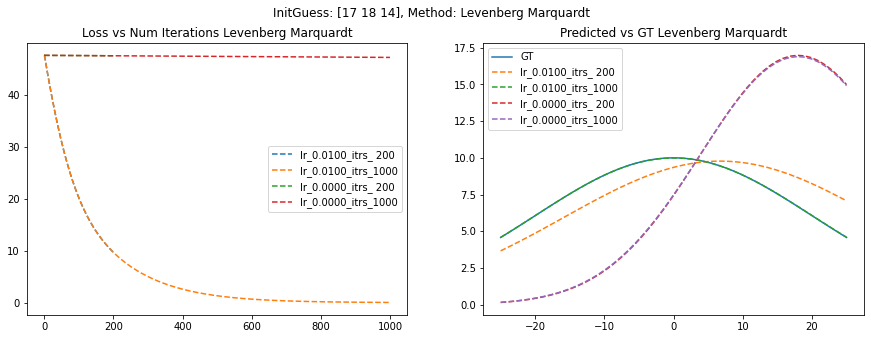

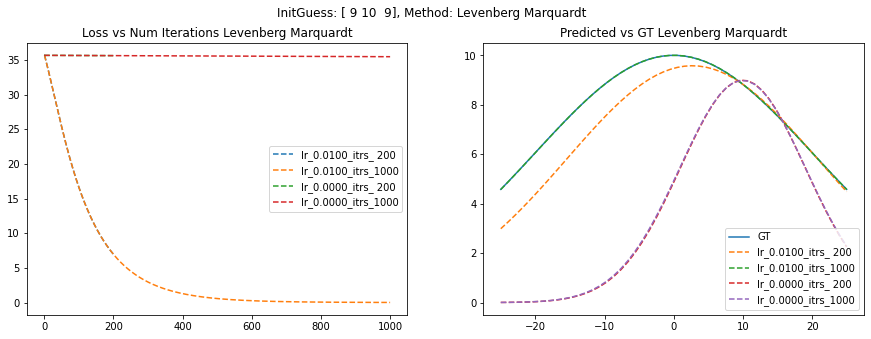

In [44]:
optimizer.compare_runs(opt_method='levenberg_marquardt')

### Difference between the three optimizers

* _**Gradient Descent**_: Utilizes the information from first-order derivative of function. Formally, we move in the negative gradient direction to reach the minima of the function
* _**Gauss Newton**_: This method utilizes the second-order derivative of function (curvature of the function) to reach the minimal. Curvature information allows faster convergence compared to the gradient descent method. 
* _**Levenberg Marquardt**_: This method is a combination of gradient descent and gauss newton. It includes a dampnin factor $\lambda$, that decided whether a gradeint descent step is taken or the gauss newton step. For large $\lambda$ values, gradient descent step is taken and for small $\lambda$ values gauss newton step is taken.

Levenberg Marquardt is the fastest optimization algorithm, as it can act as gradient descent if parameters are far from optimal parameters, and as gauss newton if the parameters are near the optimal paramters. Gauss Newton is the second fastest as it uses the second-order dervative of function to take steps. Gradient Descent is the slowest as it takes steps according to the first-order derivative of the function, which results in "zigzag" path to the optimal value.

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


In [14]:
pcd1 = o3d.io.read_point_cloud("./data/bunny.pcd")
pcd1.paint_uniform_color([0, 0, 0.7])

pcd2 = o3d.io.read_point_cloud("./data/bunny.pcd")
pcd2.paint_uniform_color([0, 0.7, 0])

T_gt = np.array(
    [
        [0.707, 0.0, 0.707, 0.2],
        [0.0, 1.0, 0.0, 0.5],
        [-0.707, 0.0, 0.707, 0.1],
        [0.0, 0.0, 0.0, 1.0],
    ],
    dtype=np.float64,
)

In [15]:
class ICP:
    def __init__(self, pcd1, pcd2, T_gt):
        
        self.T_gt = T_gt
        pcd2.transform(self.T_gt)

        self.pcd1 = pcd1
        self.pcd2 = pcd2

        self.pcd1_pts = np.array(pcd1.points)
        self.pcd2_pts = np.array(pcd2.points)

        self.new_pts = np.array([])
        
        self.T_pred = self.T_gt

    def procrustes_alignment(self, pts1, pts2):

        center1 = np.mean(pts1, axis=1, keepdims=True)
        center2 = np.mean(pts2, axis=1, keepdims=True)

        pts1 = pts1 - center1
        pts2 = pts2 - center2

        H = pts1 @ pts2.T
        U, S, V = np.linalg.svd(H)

        R = U @ V
        t = center1 - (R @ center2)

        T = np.eye(4)
        T[:3, :3] = R
        T[:3, 3:] = t

        return T, R, t

    def get_nearest_neighbors(self, pts1, pts2):

        pts1 = pts1.T
        pts2 = pts2.T

        num_pts = pts1.shape[0]

        distances = []
        indices = []

        for index in range(num_pts):
            dist = np.linalg.norm(pts1 - pts2[index], axis=1, keepdims=True)

            min_idx = np.argmin(dist, axis=0)[0]

            indices.append(min_idx)
            distances.append(dist[min_idx])

        return distances, indices

    def compute_transformation_matrix(self, num_iter=40, known_correspondence=True):

        pts1 = np.copy(self.pcd1_pts.T)
        pts2 = np.copy(self.pcd2_pts.T)

        T_pred = np.eye(4)

        distances = None

        for _ in range(num_iter):

            if not known_correspondence:
                distances, indices = self.get_nearest_neighbors(pts1, pts2)
                pts2_nearest = pts2[:, indices]
            else:
                pts2_nearest = pts2

            T, R, t = self.procrustes_alignment(pts1, pts2_nearest)

            T_pred = T_pred @ np.linalg.inv(T)

            pts2 = (R @ pts2) + t

        self.new_pts = pts2
        
        self.T_pred = T_pred

        return T_pred

    def visualize_pcds(self, title="Open3d"):
        geometry_list = [self.pcd1, self.pcd2]
        
        centroid1 = np.mean(self.pcd1_pts, axis=0)
        centroid2 = np.mean(self.pcd2_pts, axis=0)

        if self.new_pts.size != 0:
            centroid2 = np.mean(self.new_pts.T, axis=0)
            
            new_pcd = o3d.geometry.PointCloud()
            new_pcd.points = o3d.utility.Vector3dVector(self.new_pts.T)
            new_pcd.paint_uniform_color([0, 0.7, 0])

            geometry_list[-1] = new_pcd
            
        
        mesh_frame1 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=centroid1)
        mesh_frame2 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1, origin=centroid2)
        
        geometry_list += [mesh_frame1, mesh_frame2]

        o3d.visualization.draw(
            geometry_list,
            title=title,
        )

In [16]:
icp_solver = ICP(pcd1, pcd2, T_gt)

## Before
icp_solver.visualize_pcds(title="Before Procrustes")

T_pred = icp_solver.compute_transformation_matrix(num_iter=100, known_correspondence=True)
print("Estimated Transformation matrix: \n", T_pred)

## After
icp_solver.visualize_pcds(title="After Procrustes")

alignment_error = np.linalg.norm(T_pred - T_gt)
print(f"Alignment Error: {alignment_error:.4f}")

Estimated Transformation matrix: 
 [[ 0.70710739 -0.00000851  0.70710617  0.19997829]
 [-0.00001415  1.          0.00002619  0.50000241]
 [-0.70710617 -0.00002853  0.70710739  0.10002055]
 [ 0.          0.          0.          1.        ]]
Alignment Error: 0.0002


### Procrustes alignment Proof

The problem we are trying to solve is that of non-linear least squares: $min_T$ $|| P_1 - T.P_2 ||^2$, where $P_1, P_2$ are two point clouds and $T$ is the transformation matrix between them.

Now, 

$|| P_{1} - T.P_{2} ||^2$ = $tr((P_{1} - T.P_{2})(P_{1} - T.P_{2})^T)$

= $tr((P_{1} - T.P_{2})(P_{1}^{T} - P_2^{T}T^{T}))$

= $tr(P_{1}P_{1}^{T}) - tr(P_{1}P_{2}^{T}T^{T}) -tr({T}P_{2}P_{1}^{T}) + tr({T}P_{2}P_{2}^{T}T^{T})$

= $tr(P_{1}P_{1}^{T}) -2*tr({T}P_{2}P_{1}^{T}) + tr({T}P_{2}P_{2}^{T}T^{T})$

Minimizing $|| T.P_1 - P_2 ||^2$, is equivalent to maximizing $tr({T}P_{2}P_{1}^{T})$

Applying $SVD$ to  $P_{2}P_{1}^{T}$,  we get $SVD(P_{2}P_{1})$ = $U \Sigma V^T$

$\max$ {${{T} U \Sigma V^{T}}$} = $\max$ {${{R} U \Sigma V^{T}}$}, where $T = [[R | 0], [0 | I]]$ and $\Sigma$ is a diagonal matrix 

$\max$ {${U^{T}{R}V \Sigma}$} occurs when $U^{T}{R}V=I$, ie:- $R={U}V^{T}$

If the corrspondence between $P_1$ and $P_2$ are known, SVD will yield exact $U$,$\Sigma$,$V$ matrices and the procrusted alignment will give the best aligning transformation matrix.

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [17]:
icp_solver = ICP(pcd1, pcd2, T_gt)

## Before
icp_solver.visualize_pcds(title="Before ICP")

T_pred = icp_solver.compute_transformation_matrix(num_iter=100, known_correspondence=False)
print("Estimated Transformation matrix: \n", T_pred)

## After
icp_solver.visualize_pcds(title="After ICP")

alignment_error = np.linalg.norm(T_pred - T_gt)
print(f"Alignment Error: {alignment_error:.4f}")

Estimated Transformation matrix: 
 [[ 0.10049861  0.02354549  0.99465855  0.39152767]
 [-0.29808988  0.95450816  0.00752344  1.05949164]
 [ 0.94923256  0.29725374 -0.10294541 -0.36097829]
 [ 0.          0.          0.          1.        ]]
Alignment Error: 2.1429


### Does ICP always give the correct alignment? Why or Why not?

No, ICP doesn't always give the correct alignment because the correspondences between point clouds are not known and have to be estimated. Therefore, the SVD matrices computed during orthogonal procrustes alignment step will have error corresponding to incorrect correspondences.

### What are other variants of ICP and why are they helpful ?